#  Marilyn:  Loaded the necessary libraries needed for data mining

In [93]:
# Data handling
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Models (choose based on what you're using)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, DBSCAN  # for clustering (if needed)

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Association rules (optional, if you're doing market basket analysis)
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [94]:
df = pd.read_csv("data/transformed/transformed_cybersecurity_intrusion_data.csv")
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


#### Marilyn:   Inspecting the data making sure it is ready for data modeling and other data mining techniques

In [95]:
df.columns
print(df.isnull().sum())
print(df.shape)

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64
(9537, 11)


In [96]:
df_new=df.copy()
df_new = df_new.drop(columns=["session_id"])
#replacing N/A values with None
df_new["encryption_used"]=df_new["encryption_used"].fillna("None")
df_new.isnull().sum()


network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64

In [109]:
df_new.dtypes
df_new.head()



,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


### Marilyn: Preprocessing the data for  modeling

#### Marilyn: separating the data into features and target variables

In [98]:
X = df_new.drop("attack_detected", axis=1)
y = df_new["attack_detected"]
print(X.columns)
X.head(2)



Index(['network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access'],
      dtype='object')


,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0


In [99]:
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type', 'unusual_time_access']

# Encoding categorical columns using Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

#scaling numerical features 
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

### Marilyn: Splitting the data into training and testing sets

In [100]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Marilyn: Modeling Using Logistic Regression

In [ ]:

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)



### Marilyn : Modeling Using Decision Tree Classifier

In [103]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

### Marilyn : Modeling Using the Random forest classfier Classifier

In [104]:
# 3. Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)


#### Marilyn: Model Evaluation

In [105]:
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("-" * 40)

# Comparing the Results
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Decision Tree", y_test, tree_pred)
evaluate_model("Random Forest", y_test, forest_pred)

=== Logistic Regression ===
Accuracy: 0.7285115303983228
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1055
           1       0.71      0.66      0.68       853

    accuracy                           0.73      1908
   macro avg       0.73      0.72      0.72      1908
weighted avg       0.73      0.73      0.73      1908

----------------------------------------
=== Decision Tree ===
Accuracy: 0.8259958071278826
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1055
           1       0.81      0.80      0.80       853

    accuracy                           0.83      1908
   macro avg       0.82      0.82      0.82      1908
weighted avg       0.83      0.83      0.83      1908

----------------------------------------
=== Random Forest ===
Accuracy: 0.8841719077568134
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1

In [106]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Dictionary to store scores
model_scores = {}

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    model_scores[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": report['1']['precision'],   # class 1 = attack
        "Recall": report['1']['recall'],
        "F1-Score": report['1']['f1-score']
    }


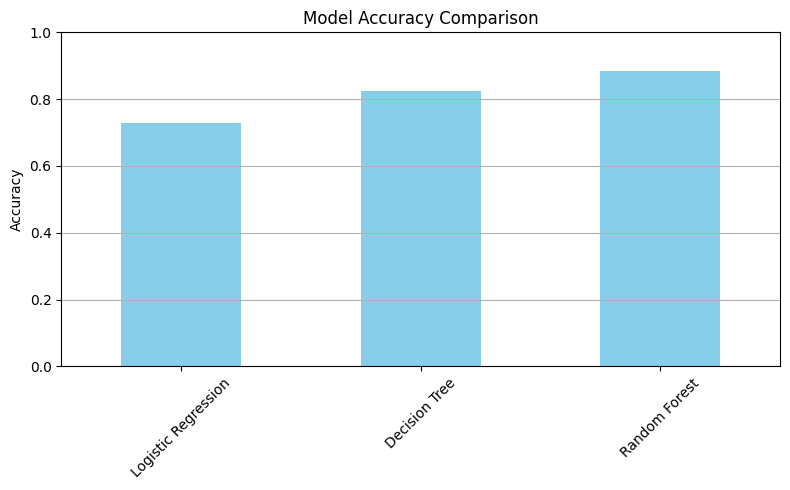

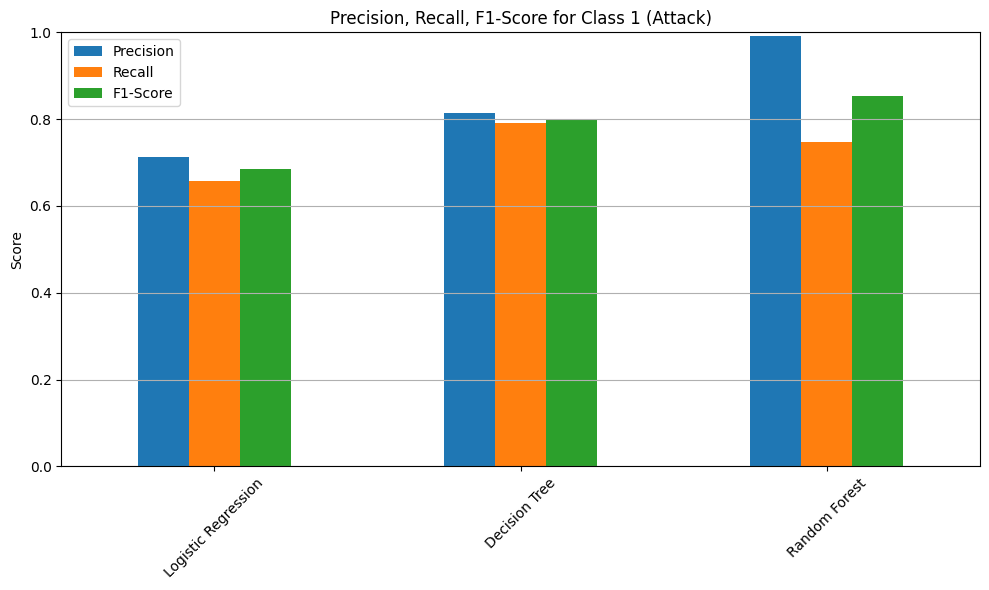

In [107]:
# Convert to DataFrame for easier plotting
import pandas as pd

scores_df = pd.DataFrame(model_scores).T  # Transpose for plotting

# Plot Accuracy
scores_df['Accuracy'].plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Plot Precision, Recall, F1-Score
scores_df[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, F1-Score for Class 1 (Attack)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


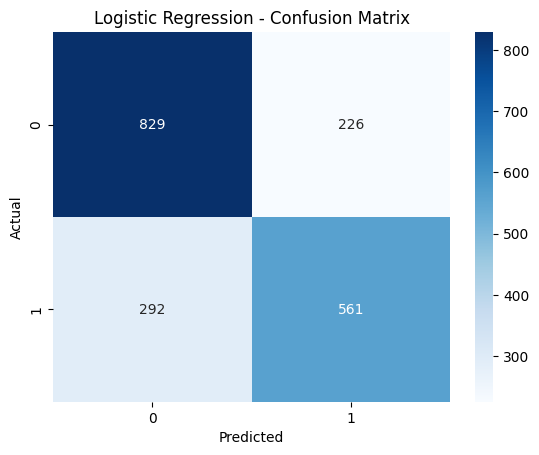

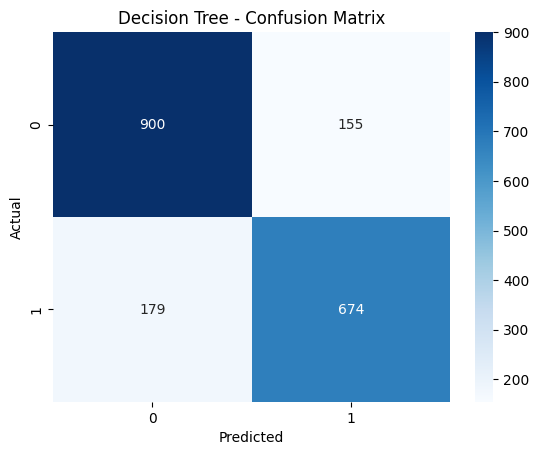

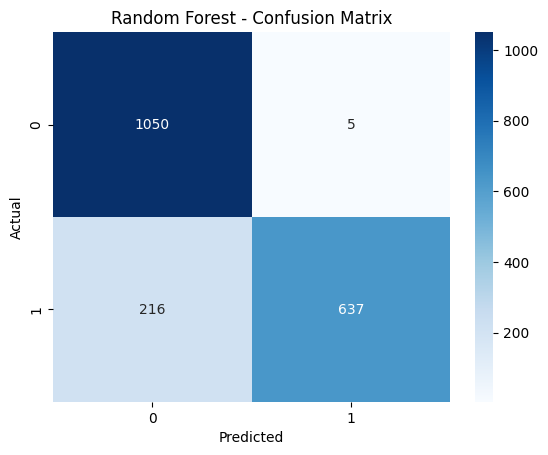

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)


### Unsupervised learning using KMean clusters

In [110]:
X_cluster=df_new.drop(columns=["attack_detected"])
